
## 1. Linear Regression 


## 1.1 Loading and preprocessing Data

In [146]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline

In [147]:
bitrate_train_df = pd.read_csv('./bitrate_train.csv', low_memory=False)
bitrate_test_df = pd.read_csv('./bitrate_test.csv', low_memory=False)
bitrate_train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fps_mean,379021.0,35.231127,10.975010,10.0,28.800000,30.000000,43.600000,125.800000
fps_std,379021.0,1.725705,2.505942,0.0,0.316228,0.942809,2.233582,307.167273
rtt_mean,379021.0,49.623858,94.781098,0.0,14.300000,32.200000,55.900000,12898.400000
rtt_std,379021.0,12.763672,112.684460,0.0,0.699206,1.433721,4.948625,40721.933293
dropped_frames_mean,379021.0,0.180451,1.732890,0.0,0.000000,0.000000,0.000000,540.000000
dropped_frames_std,379021.0,0.469548,3.157866,0.0,0.000000,0.000000,0.000000,202.385770
dropped_frames_max,379021.0,1.450719,9.670928,0.0,0.000000,0.000000,0.000000,640.000000
bitrate_mean,379021.0,7516.585502,6073.992189,0.0,2773.300000,6287.200000,10187.200000,64913.500000
bitrate_std,379021.0,1603.487501,1721.021623,0.0,383.683550,1112.710010,2241.848801,26908.532303
target,379021.0,7525.396231,6070.817736,0.0,2785.000000,6296.000000,10192.000000,64913.000000


### 1.1.1 profiling Data

In [ ]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
#from pandas_profiling import ProfileReport

#report = ProfileReport(bitrate_train_df)
#report.to_file('bitrate_train_df_profile_report.html')

### 1.1.2 Remove duplicate

In [148]:
bitrate_train_df.drop_duplicates(inplace=True)


### 1.1.3 Remove Outliers

In [149]:
def outlier_removal(dframe,feature):
  # Mean
  u = np.mean(dframe.loc[dframe.index,feature])
  # Std
  s = np.std(dframe.loc[dframe.index,feature])
  # Upper bound
  upper = np.where(dframe.loc[dframe.index,feature]>= (u+3*s))
  # Lower bound
  lower = np.where(dframe.loc[dframe.index,feature] <= (u-3*s))
 
  dframe.drop(dframe.index[upper[0]], inplace = True)
  dframe.drop(dframe.index[lower[0]], inplace = True)

  return dframe



print("New Shape: ", bitrate_train_df.shape)

bitrate_train_df=outlier_removal(bitrate_train_df,'target')
bitrate_train_df=outlier_removal(bitrate_train_df,'bitrate_mean')

print("Old Shape: ", bitrate_train_df.shape)


New Shape:  (375660, 10)
Old Shape:  (369097, 10)


### 1.1.4 Correlearion matrix

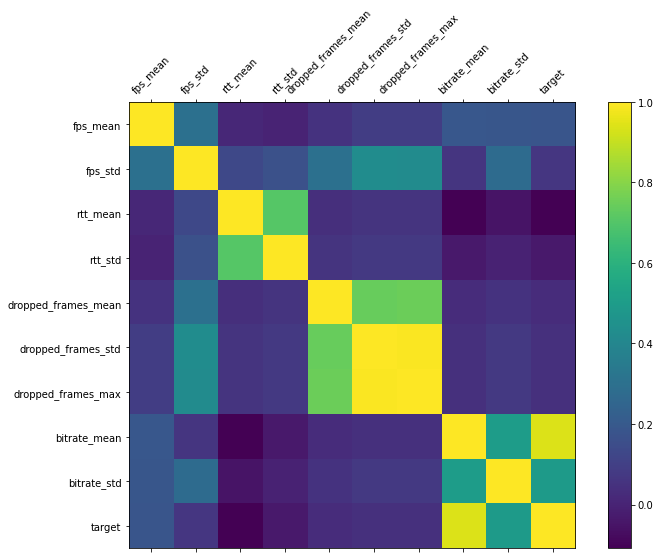

In [150]:
f = plt.figure(figsize=(12, 8))
plt.matshow(bitrate_train_df.corr(), fignum=f.number)
plt.xticks(range(bitrate_train_df.select_dtypes(['number']).shape[1]), bitrate_train_df.select_dtypes(['number']).columns, fontsize=10, rotation=45)
plt.yticks(range(bitrate_train_df.select_dtypes(['number']).shape[1]), bitrate_train_df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)


## 1.2 Simple linear regression

### 1.2.1 Features selection

In [151]:
X_train=bitrate_train_df[['bitrate_mean']]
y_train=bitrate_train_df[["target"]]

### 1.2.2 visulaizing data

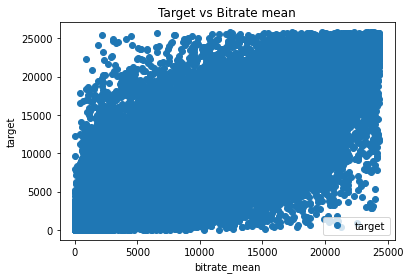

In [152]:
bitrate_train_df.plot(x='bitrate_mean', y='target', style='o')
plt.title('Target vs Bitrate mean')
plt.xlabel('bitrate_mean')
plt.ylabel('target')
plt.show()


### 1.2.3 Model fitting

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficients : {regressor.coef_}")


Model intercept : [431.04533486]
Model coefficients : [[0.94247227]]


### 1.2.4 Model evaluation

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score


X_test=bitrate_test_df[['bitrate_mean']]
y_test=bitrate_test_df[['target']]

y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score on test: ', r2_score(y_test, y_pred))
print('R2 score on train: ', r2_score(y_train, regressor.predict(X_train)))

Mean Absolute Error: 1079.375235271045
Mean Squared Error: 3825402.5368750934
Root Mean Squared Error: 1955.863629416707
R2 score on test:  0.8927277008974488
R2 score on train:  0.8826850962657488


## 1.3 Multiple Linear Regression

### 1.3.1 Remove Outliers

In [160]:
def outlier_removal(dframe,feature):
  # Mean
  u = np.mean(dframe.loc[dframe.index,feature])
  # Std
  s = np.std(dframe.loc[dframe.index,feature])
  # Upper bound
  upper = np.where(dframe.loc[dframe.index,feature]>= (u+3*s))
  # Lower bound
  lower = np.where(dframe.loc[dframe.index,feature] <= (u-3*s))
 
  dframe.drop(dframe.index[upper[0]], inplace = True)
  dframe.drop(dframe.index[lower[0]], inplace = True)

  return dframe



print("New Shape: ", bitrate_train_df.shape)

bitrate_train_df=outlier_removal(bitrate_train_df,'target')
bitrate_train_df=outlier_removal(bitrate_train_df,'bitrate_mean')
bitrate_train_df=outlier_removal(bitrate_train_df,'bitrate_std')
bitrate_train_df=outlier_removal(bitrate_train_df,'fps_mean')
bitrate_train_df=outlier_removal(bitrate_train_df,'fps_std')


print("Old Shape: ", bitrate_train_df.shape)


New Shape:  (352637, 10)
Old Shape:  (339500, 10)


### 1.3.2 feautres selection and model fitting

In [161]:
X_train = bitrate_train_df.drop(['rtt_mean','rtt_std','dropped_frames_mean','dropped_frames_max','dropped_frames_std','target'], axis=1)

y_train=bitrate_train_df[["target"]]

regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficients : {regressor.coef_}")


Model intercept : [299.91185582]
Model coefficients : [[ 0.28570041 13.51336422  0.9324757   0.11333692]]


### 1.3.3 model evaluation

In [162]:
from sklearn.metrics import r2_score


X_test = bitrate_test_df.drop(['rtt_mean','rtt_std','dropped_frames_mean','dropped_frames_max','dropped_frames_std','target'], axis=1)
y_test = bitrate_test_df[['target']]


y_pred = regressor.predict(X_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('R2 score on test: ', r2_score(y_test, y_pred))
print('R2 score on train: ', r2_score(y_train, regressor.predict(X_train)))

Mean Absolute Error: 1068.3056587021638
Mean Squared Error: 3801849.7391778133
Root Mean Squared Error: 1949.8332593270156
R2 score on test:  0.8933881706741402
R2 score on train:  0.904258899356271


##1.4 polynomial Regression


In [163]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



In [164]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


degrees = [1, 2, 5]

X_train = bitrate_train_df.drop(['rtt_mean','rtt_std','dropped_frames_mean','dropped_frames_max','dropped_frames_std','target'], axis=1)

y_train=bitrate_train_df[["target"]]

X_test = bitrate_test_df.drop(['rtt_mean','rtt_std','dropped_frames_mean','dropped_frames_max','dropped_frames_std','target'], axis=1)
y_test = bitrate_test_df[['target']]

for i in range(len(degrees)):

    polynomial_features = PolynomialFeatures(degree=degrees[i])
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train, y_train)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline,X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)

    y_pred=pipeline.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print("Degree {}\nMSE = {:}(+/- {:})".format(
        degrees[i], -scores.mean(), scores.std()))



Mean Absolute Error: 1068.305658702165
Mean Squared Error: 3801849.739177817
Root Mean Squared Error: 1949.8332593270168
Degree 1
MSE = 2620517.233274005(+/- 246802.8723329472)
Mean Absolute Error: 1055.408723984625
Mean Squared Error: 3888569.0275327847
Root Mean Squared Error: 1971.9454930430468
Degree 2
MSE = 2598439.281290308(+/- 241604.15359259743)
Mean Absolute Error: 12105.592966576623
Mean Squared Error: 268665940421.7162
Root Mean Squared Error: 518329.9532360793
Degree 5
MSE = 4845041.750812905(+/- 2092510.5665821438)


## 1.5 Multiple linear regression with regulization

In [165]:
from sklearn.linear_model import Lasso

X_train = bitrate_train_df.drop(['rtt_mean','rtt_std','dropped_frames_mean','dropped_frames_max','dropped_frames_std','target'], axis=1)

y_train=bitrate_train_df[["target"]]

X_test = bitrate_test_df.drop(['rtt_mean','rtt_std','dropped_frames_mean','dropped_frames_max','dropped_frames_std','target'], axis=1)


y_test=bitrate_test_df[['target']]

X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/8, random_state=123)

lasso = Lasso()
lasso.fit(X_train, y_train)


print('Lasso coef ', lasso.coef_)


Lasso coef  [ 0.17979518 13.10365651  0.93285779  0.11224   ]


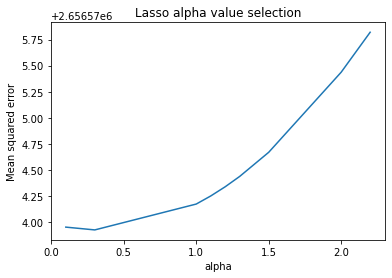

Best value of alpha: 0.3


In [166]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.metrics import mean_squared_error
%matplotlib inline

alphas = [2.2, 2, 1.5, 1.3, 1.2, 1.1, 1, 0.3, 0.1]
losses = []
for alpha in alphas:
    model = Lasso(alpha = alpha).fit(X_train, y_train)
    mse = mean_squared_error(model.predict(x_val),y_val)
    losses.append(mse)
plt.plot(alphas, losses)
plt.title("Lasso alpha value selection")
plt.xlabel("alpha")
plt.ylabel("Mean squared error")
plt.show()

best_alpha = alphas[np.argmin(losses)]
print("Best value of alpha:", best_alpha)


In [168]:
lasso = Lasso(best_alpha)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1067.959465665806
Mean Squared Error: 3801890.126734312
Root Mean Squared Error: 1949.843615968807


##2 Logistic Regression

## 2.1 reading data

In [196]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline

In [197]:
train_data_df = pd.read_csv('./train_data.csv')
test_data_df = pd.read_csv('./test_data.csv')
train_data_df.drop_duplicates(inplace=True)
train_data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fps_mean,373142.0,35.069812,1.139201e+01,0.0,28.200000,30.000000,44.100000,1.271000e+02
fps_std,373142.0,2.489203,3.805238e+00,0.0,0.421637,1.229273,2.836273,3.125408e+02
fps_lags,373142.0,0.097370,5.675634e-01,0.0,0.000000,0.000000,0.000000,1.000000e+01
rtt_mean,373142.0,57.281921,1.356887e+02,0.0,16.000000,34.000000,59.200000,1.289840e+04
rtt_std,373142.0,21.229666,1.631101e+02,0.0,0.788811,1.712698,6.196773,4.072193e+04
dropped_frames_mean,373142.0,346235.005845,2.030192e+07,0.0,0.000000,0.000000,0.000000,2.097289e+09
dropped_frames_std,373142.0,149161.674525,9.614595e+06,0.0,0.000000,0.000000,0.000000,9.963751e+08
dropped_frames_max,373142.0,522273.665476,2.749080e+07,0.0,0.000000,0.000000,0.000000,2.097289e+09
auto_fec_mean,373142.0,51.952779,3.550680e+01,0.0,50.000000,50.000000,50.000000,2.500000e+02
stream_quality,373142.0,0.063927,2.446239e-01,0.0,0.000000,0.000000,0.000000,1.000000e+00


##2.2 profiling

In [ ]:
# !pip uninstall pandas-profiling

In [ ]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
#from pandas_profiling import ProfileReport

#report = ProfileReport(train_data_df)
#report.to_file('train_data_df.html')

install category_encoders

In [ ]:
#pip install category_encoders

## 2.3 PreProcessing

### 2.3.1 Correlation Matrix

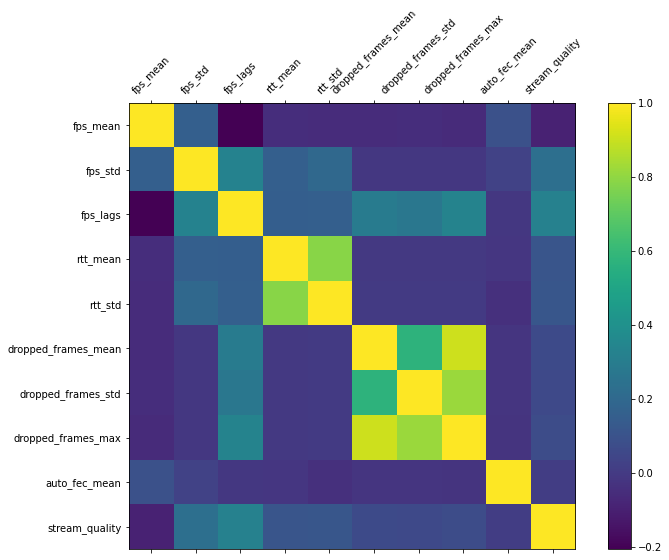

In [198]:
f = plt.figure(figsize=(12, 8))
plt.matshow(train_data_df.corr(), fignum=f.number)
plt.xticks(range(train_data_df.select_dtypes(['number']).shape[1]), train_data_df.select_dtypes(['number']).columns, fontsize=10, rotation=45)
plt.yticks(range(train_data_df.select_dtypes(['number']).shape[1]), train_data_df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

### 2.3.2 balancing data
up sampling the small group upto the large group of data

In [192]:
train_data_df_0 = train_data_df[train_data_df['stream_quality'] == 0]
train_data_df_1 = train_data_df[train_data_df['stream_quality'] == 1]

# up-sampling the data
train_data_df_1_over = train_data_df_1.sample(len(train_data_df_0.index), replace=True)

train_data_df = pd.concat([train_data_df_0, train_data_df_1_over], axis=0)


###2.3.3 Feature Selection
select the corrlected features with the target (using the correlation matrix and the profiling)

In [199]:
from sklearn.impute import SimpleImputer
from category_encoders import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



x_train=train_data_df.drop(['fps_mean','rtt_mean','rtt_std','auto_fec_mean'], axis = 1)

x_test=test_data_df.drop(['fps_mean','rtt_mean','rtt_std','auto_fec_mean'], axis = 1)


### 2.3.4 PCA Visualization

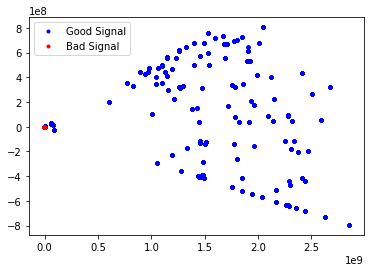

In [174]:

from sklearn.decomposition import PCA
import plotly.express as px

X = x_train[['fps_std', 'fps_lags', 'dropped_frames_mean', 'dropped_frames_std','dropped_frames_max']]
y=x_train[["stream_quality"]]

pca = PCA(n_components=2)
components = pca.fit_transform(X,y)

y_np = y.values.reshape(-1)
x_pca_filter = [y_np[i] == 1 for i in range(len(y_np))]


x_pca_good = components[x_pca_filter]


x_pca_filter = [y_np[i] == 0 for i in range(len(y_np))]
x_pca_bad = components[x_pca_filter]

plt.plot(x_pca_good[:, 0], x_pca_good[:, 1], '.', color='b')
plt.plot(x_pca_bad[:, 0], x_pca_bad[:, 1], '.', color='r')
plt.legend(["Good Signal", "Bad Signal"])

plt.show()


### 2.3.5 Features encodeing and scaling  

In [200]:
# encode categorical features
features_to_encode = ['auto_bitrate_state','auto_fec_state']
encoder = OneHotEncoder(cols=features_to_encode)

encoder.fit(x_train)

x_train_c = encoder.transform(x_train)
x_test_c = encoder.transform(x_test)

# feature scaling using MinMaxScaler
scaler = MinMaxScaler().fit(x_train_c)
x_train = pd.DataFrame(scaler.transform(x_train_c), columns=x_train_c.columns)
scaler = MinMaxScaler().fit(x_test_c)
x_test = pd.DataFrame(scaler.transform(x_test_c), columns=x_test_c.columns)

### 2.3.6 Remove Outliers 

In [201]:
def outlier_removal(dframe,feature):
  
  u = np.mean(dframe.loc[dframe.index,feature])
  s = np.std(dframe.loc[dframe.index,feature])
  upper = np.where(dframe.loc[dframe.index,feature]>= (u+3*s))
  lower = np.where(dframe.loc[dframe.index,feature] <= (u-3*s))
 
  dframe.drop(dframe.index[upper[0]], inplace = True)
  dframe.drop(dframe.index[lower[0]], inplace = True)
  return dframe


print("Old Shape: ", x_train.shape)
x_train=outlier_removal(x_train,'fps_std')
x_train=outlier_removal(x_train,'fps_lags')
x_train=outlier_removal(x_train,'dropped_frames_mean')
x_train=outlier_removal(x_train,'dropped_frames_std')
x_train=outlier_removal(x_train,'dropped_frames_max')

print("New Shape: ", x_train.shape)


Old Shape:  (373142, 11)
New Shape:  (341548, 11)


## 2.4 Logistic Regression

### 2.4.1 Fitting Logistic Regression

In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


y_train=x_train[['stream_quality']]
y_test=x_test[['stream_quality']]

x_train=x_train.drop(['stream_quality'], axis = 1)
x_test=x_test.drop(['stream_quality'], axis = 1)

# fit Logistic Regression


clf = LogisticRegression(random_state=0).fit(x_train, y_train)

y_test_pred = clf.predict(x_test)

# calculate metrics
print('Testing accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Testing precision = {}'.format(metrics.precision_score(y_test, y_test_pred)))
print('Testing recall = {}'.format(metrics.recall_score(y_test, y_test_pred)))
print('Testing f1_score = {}'.format(metrics.f1_score(y_test, y_test_pred)))



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing accuracy = 0.9399825941312665
Testing precision = 0.6470427163198248
Testing recall = 0.1505670957053651
Testing f1_score = 0.24428822495606328


### 2.4.2 Logistic Regression Coefficients

In [187]:
# Logistic Regression Coefficients
print("----Logistic Regression Coefficients----")
print(*[a for a in zip(list(x_train.columns), clf.coef_[0])], sep='\n')

----Logistic Regression Coefficients----
('fps_std', 20.757274039126422)
('fps_lags', 12.165337026449965)
('dropped_frames_mean', -0.13217165405335024)
('dropped_frames_std', -0.12128097461373955)
('dropped_frames_max', -0.20024274464921066)
('auto_bitrate_state_1', -0.25233192845336255)
('auto_bitrate_state_2', -0.03884913292841765)
('auto_bitrate_state_3', 0.03448740850838517)
('auto_fec_state_1', 0.13247188569855883)
('auto_fec_state_2', -0.38916553858504926)


###2.4.3 calculate metrics for each threshold

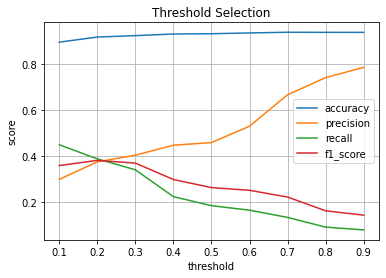

In [188]:
#calculate metrics for each threshold above and plot the result as below.
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
pred_proba = clf.predict_proba(x_test)

results = [[],[],[],[]]
for i in thresholds:
    y_test_pred_thr = np.where(pred_proba[:, 1] > i, 1, 0)
    results[0].append(metrics.accuracy_score(y_test, y_test_pred_thr))
    results[1].append(metrics.precision_score(y_test, y_test_pred_thr))
    results[2].append(metrics.recall_score(y_test, y_test_pred_thr))
    results[3].append(metrics.f1_score(y_test, y_test_pred_thr))

plt.plot(thresholds, results[0], label = 'accuracy')   
plt.plot(thresholds, results[1], label = 'precision')   
plt.plot(thresholds, results[2], label = 'recall')
plt.plot(thresholds, results[3], label = 'f1_score')

plt.title('Threshold Selection')
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.grid()

###2.4.5 Confusion Matrix

sklearn Confusion Matrix for Sample set:
 [[183277  44625]
 [  6239   9455]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


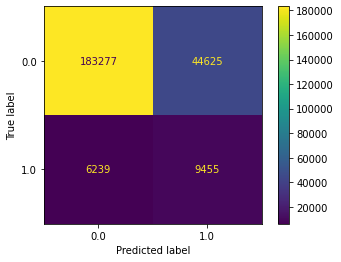

In [180]:
# Run this block of code to see what your result should look like
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print('Confusion Matrix :\n', confusion_matrix(y_test, y_test_pred))
plot_confusion_matrix(clf, x_test, y_test)  
plt.show()